# Derivadas Numéricas

Al contrario de las integrales, las derivadas usualmente pueden ser evaluadas de forma analítica. Además de esto, existen ciertos problemas que hacen la **evualuación de derivadas numéricas inestables a errores de redondeo debido a la precisión de números flotantes**. Sin embargo, existen al menos dos aplicaciones prácticas:
* Solución de ecuaciones diferenciales parciales: existen muchos métodos, algunos basados en técnicas de diferenciación numérica. Entraremos más en detalle más adelante en el curso.
* Derivadas numéricas de conjuntos de datos.
* Algunos algoritmos para resolver ecuaciones que no tienen solución analítica.

Para el segundo y tercero de estos casos, en la rama de las matemáticas aplicadas se han desarrollado mejores técnicas; e.g., [diferenciación automática](https://en.wikipedia.org/wiki/Automatic_differentiation), las cuales no sufren de la problemática de las diferencias finitas.

No obstante, para algunos algoritmos es importante entender y tener claro el concepto.

## Diferencias hacia adelante y hacia atrás

La idea es muy sencilla. Conocemos la definición formal de una derivada:
$$
\frac{{\rm d}f(x)}{{\rm d}x} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}.
$$
A nivel numérico, la definición es la misma, con la excepción de que se considera un valor de $h$ lo suficientemente pequeño de manera tal que la derivada está relativamente bien aproximada.

En la práctica, existen dos formas de realizar la misma operación.
La primera, es la diferencia hacia adelante
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x + h) - f(x)}{h}
$$
y la segunda es la diferencia hacia atrás
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x) - f(x - h)}{h}.
$$
Para efectos prácticos, ambas aproximaciones evaluan la derivada de manera muy similar en casos típicos donde podemos utilizar dicha metodología.

Ver Fig. 1 para visualizar la diferencia.

<img src="Fig1.png" alt="drawing" width="400" title="Figura 1"/>

Las diferencias finitas para aproximar derivadas están basadas en expansiones de Taylor, al igual que la estimación de errores. Note que su estimación es considerablemente más sencilla que las integrales.

El único parámetro de control corresponde al valor de $h$.

## Errores

Para analizar cual es el valor requerido de $h$ para cierta aplicación, necesitamos evaluar el error asociado con la estimación. Esto es muy sencillo al observar la expansión de Taylor de la función
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3),
$$
de manera tal que
$$
f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2} f''(x) + O(h^2).
$$
Note que el primer término del lado derecho de la ecuación anterior es nuestra aproximación, de manera tal que el error **escala linealmente con $h$**. Esta misma derivación se puede realizar para las diferencias hacia adelante y hacia atrás.

La aproximación, por ende, es del mismo orden de magnitud de $h$ si ignoramos los términos de orden mayor. Esto implica que, en general, debemos utilizar valores de $h$ muy pequeños con los cuales podemos sufrir errores de redondeo de operaciones de punto flotante.

### Análisis de errores de punto flotante

En efecto, el mayor orden del error depende de la magnitud $\frac{1}{2}h|f''(x)|$. El problema es que sustraer números de magnitud pequeña de punto flotante puede dar lugar a amplios errores en la computadora si los términos son muy similares en magnitud. Este es precisamente el caso aquí, en el cual debemos sustraer 
$$
f(x + h) - f(x),
$$
cuando consideramos valores de $h$ muy pequeños. 

De esta manera, **debemos considerar valores de $h$ pequeños en magnitud para mejorar la aproximación, pero esto nos lleva a grandes errores de redondeo computacionales.**

En Python, podemos calcular un número como $f(x)$ con una precisión $Cf(x)$, donde el valor de $C$ varía pero usualmente en orden de magnitud $C \sim 10^{-16}$. En el peor de los casos (cuando los errores no se cancelan) podemos decir que podemos aproximar $f(x + h) - f(x)$ con una precisión de 
$$
2C|f(x)|.
$$
De esta manera, el **error de redondeo** es approximadamente $\sim 2C|f(x)| / h$. Combinado con el **error de aproximación**, tenemos el error total
\begin{align}
\label{eq:total_error} \tag{1}
\boxed{\epsilon = \frac{2C|f(x)|}{h} + \frac{1}{2}h|f''(x)|.}
\end{align}
Para minimizar este error, evaluamos ${\rm d}\epsilon / {\rm d}h = 0$, tal que
$$
-\frac{2C|f(x)|}{h^2} + \frac{1}{2}|f''(x)| = 0.
$$
Podemos resolver para el valor de $h_{\rm min}$, obtenemos
$$
h_{\rm min} = \sqrt{4C\frac{|f(x)|}{|f''(x)|}},
$$
tal que al substituir en Eq. $\eqref{eq:total_error}$ da lugar al error mínimo
$$
\epsilon_{\rm{min}} = \sqrt{4C|f(x)||f''(x)|}.
$$
Si $|f(x)| \sim |f''(x)| \sim 1$, entonces un valor de $h \sim \sqrt{C} \sim 10^{-8}$ nos da un error total del mismo orden de magnitud. 

Para comparación, este error es sustancialmente más grande que el de cualquier algoritmo que hemos discutido en esta clase. Hacer el mismo desarrollo anterior para el caso de las diferencias hacia atrás nos da el mismo resultado.

## Diferencias Centrales

El análisis anterior nos indica que debemos tener mucho cuidado al utilizar diferencias finitas. En particular, el problema se hace más grande cuando utilizamos diferencias finitas repetidas veces, en cuyo caso el error se **acumula**.

Existe una forma sencilla de aliviar este problema de manera parcial. Consideremos el caso de **diferencias centrales**, tal que
$$
\frac{{\rm d}f(x)}{{\rm d}x} \approx \frac{f(x + h/2) - f(x - h/2)}{h}.
$$
Al igual que el caso de diferencias hacia delante y hacia atrás, la subdivisión sigue siendo de tamaño $h$. El cambio es que ahora los puntos están colocados de forma simétrica alrededor de $x$. El error de aproximación sigue el mismo procedimiento anterior utilizando expansiones de Taylor, lo que da lugar a
$$
f'(x) = \frac{f(x + h/2) - f(x - h/2)}{h} - \frac{h^2}{24} f'''(x) + \cdots
$$
Este cambio tan sencillo nos da un orden de magnitud más alto al error de aproximación. Al proceder de la misma forma que lo hicimos anteriormente, minimizar el error $\epsilon$ resulta en
$$
\epsilon_{\rm min} = (\frac{9}{8} C^2 [f(x)]^2 |f'''(x)|)^{1/3}.
$$
En este caso, si $|f(x)| ~\sim |f'''(x)| ~\sim 1$, el valor ideal de $h \sim C^{1/3} ~\sim 10^{-5}$, pero el error total $\epsilon \sim C^{2/3} \sim 10^{-10}$.
De esta manera, podemos mejorar nuestra aproximación por dos ordenes de magnitud utilizando **diferencias centrales**.

En la medida de lo posible, si se debe utilizar diferencias finitas, lo correcto es utilizas diferencias centrales.

## Ejemplo

Evaluemos el error al que incurrimos utilizando diferencias finitas con un ejemplo. Consideremos
$$
f(x) = e^{-x^2}
$$
y evaluemos su derivada en el punto $x = 0.5$. 

Empezamos por definir nuestras funciones de diferencias finitas:

In [1]:
def backward_difference(func, x, h):
    return (func(x) - func(x - h)) / h

def forward_difference(func, x, h):
    return (func(x + h) - func(x)) / h

def central_difference(func, x, h):
    return (func(x + (h / 2)) - func(x - (h / 2))) / h

Evaluemos el resultado utilizando diferentes valores de $h$, cambiando en orden de magnitud:

In [2]:
import numpy as np

h_vals = np.logspace(-16, 0, 17)
print(h_vals)

[1.e-16 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]


Nos interesa la diferencia absoluta entre el valor análitico y nuestra aproximación numérica:

In [3]:
f_prime_analytic = -2.0 * 0.5 * np.exp(-1.0 * 0.5 * 0.5)

Y ahora hacemos nuestro cálculo:

In [4]:
def func(x):
    return np.exp(-1.0 * x * x)

backward_results = np.array([backward_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])
forward_results = np.array([forward_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])
central_results = np.array([central_difference(func, 0.5, h_vals[i]) for i in range(h_vals.size)])

Hagamos un gráfico en escala logarítmica del error relativo de nuestros resultados con respecto al resultado analítico como función de $h$:

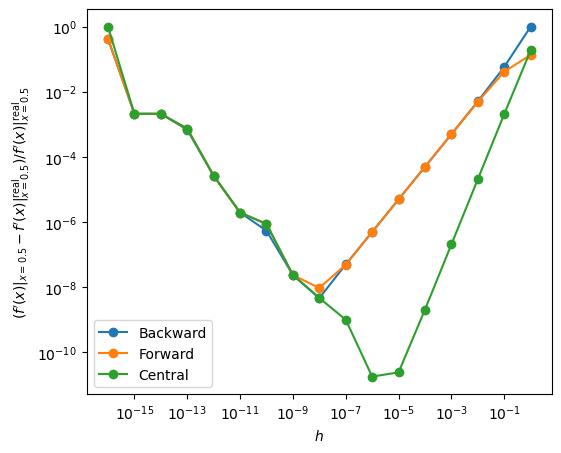

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.yscale("log")
plt.xscale("log")

plt.xlabel(r"$h$")
plt.ylabel(r"$(f'(x)|_{x=0.5} - f'(x)|^{\rm{real}}_{x=0.5}) / f'(x)|^{\rm{real}}_{x=0.5}$")

plt.plot(h_vals, np.abs((backward_results - f_prime_analytic) / f_prime_analytic), '-o', label='Backward')
plt.plot(h_vals, np.abs((forward_results - f_prime_analytic) / f_prime_analytic), '-o', label='Forward')
plt.plot(h_vals, np.abs((central_results - f_prime_analytic) / f_prime_analytic), '-o', label='Central')
plt.legend()
plt.show()

* Existen formas de mejorar este error estudiando ordenes mayores en la aproximación (similar a lo que hicimos con integración)
* **Crucialmente**, con el segundo orden obtenemos la misma precisión y debemos ir a 3$^{\rm{er}}$ orden para notar una mejora!
* Para efectos prácticos, aproximaciones de mayor orden suelen no ser convenientes.
* Las reglas estudiadas aquí se extienden fácilmente a segundas derivadas y derivadas parciales, con sus respectivos errores mínimos.

# Interpolación

<img src="Fig2.png" alt="drawing" width="400" title="Figura 2"/>

Supongamos que tenemos los valores de una función $f(x)$ en solamente dos puntos $x = a, b$ y queremos saber el valor de la función en otro punto $x$ tal que $a \lt x \lt b$. 

Existen distintas posibilidades para aproximar este valor. La más sencilla es **interpolación lineal**, en la cual se traza una línea recta entre los puntos $a$ y $b$. (Ver Fig. 2)

Recuerde que el concepto de interpolación es distinto al concepto de ajustes de datos.

El álgebra de la interpolación lineal es muy sencilla. La pendiente de la recta es
$$
m = \frac{f(b) - f(a)}{b - a}.
$$
y la distancia vertical marcada en el gráfico es $y = m(x-a)$ y $z = f(a)$, tal que
$$
f(x) \approx y + z = \frac{(b-x)f(a) + (x-a)f(b)}{b-a}.
$$
Esta ecuación es la ecuación fundamental de interpolación lineal. Se puede utilizar también para **extrapolación**. 

### Análisis de errores

El error al que incurrimos con una interpolación lineal sigue de la expansión de Taylor. Tenemos
$$
f(a) = f(x) + (a-x)f'(x) + \frac{1}{2}(a-x)^2f''(x) + \cdots
$$
y
$$
f(b) = f(x) + (b-x)f'(x) + \frac{1}{2}(b-x)^2f''(x) + \cdots,
$$
de manera tal que al sustituir en la ecuación de la interpolación obtenemos
$$
f(x) = \frac{(b-x)f(a) + (x-a)f(b)}{b-a} + (a-x)(b-x)f''(x) + \cdots
$$
El primer término es nuestra aproximación, de manera tal que el segundo término es el orden mayor del error de aproximación. Conforme $x$ se aproxima a $a$ o a $b$, el error decrece.

El error es mayor en el punto medio entre $a$ y $b$, de manera tal que si definimos $b - a = h$, en el medio tenemos $x - a = b - x = h / 2$. Esto implica que el mayor orden del error es
$$
\epsilon_{\rm max} = \frac{1}{4}h^2|f''(x)| + O(h^{\geq 3}).
$$
En este caso, *no tenemos que preocuparnos por el error de redondeo*. Esto se debe a que la interpolación se refiere a la **suma de dos valores cercanos y no a su diferencia**.

### Métodos de orden mayor

* Existen métodos de mayor orden conocidos como métodos de interpolación de Lagrange: la idea es usar polinomios de mayor orden
* Si tenemos un número $N$ de puntos base en nuestros datos, ingenuamente podríamos creer establecer un polinomio de orden $N-1$ entre los puntos sería la mejor aproximación
* El problema es que los polinomios de orden alto contienen muchas oscilaciones, haciendo la aproximación de interpolación muy pobre
* Un método común, es utilizar polinomios en los puntos del medio y sus derivadas en los puntos extremos, de manera tal que se obtiene una curva que aproxima los puntos pero contiene pendientes suaves en el medio
* Esta técnica se conoce como **splines**
* La más común es la *spline* cúbica.



## Ejemplo

Realicemos un ejemplo de interpolación utilizando `SciPy`.

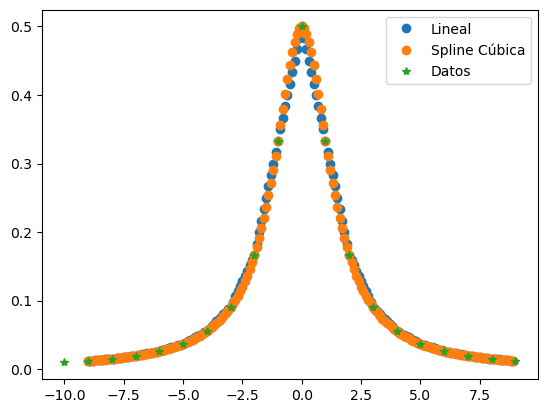

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d

# Datos ficticios para la interpolación
x = np.arange(-10,10)
y = 1.0 / (2.0 + x**2)

# Puntos en los cuales queremos hacer la interpolación
xs = np.arange(-9, 9, 0.1)

# Interpolación Lineal
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# Spline cúbica
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# Gráfico
plt.plot(xs, ys_lin, 'o', label='Lineal')
plt.plot(xs, ys_cub, 'o', label='Spline Cúbica')
plt.plot(x, y, '*', label='Datos')
plt.legend()
plt.show()

# Solución de las raíces de ecuaciones no lineales

Existen diversas metodologías para resolver ecuaciones no lineales. 

### El método de relajación

<img src="Fig3.png" alt="drawing" width="500" title="Figura 3"/>

La idea es resolver una ecuación de la forma
$$
x = f(x).
$$
Para utilizar esta metodología, se requiere escribir la ecuación en esta forma.

La idea corresponde a utilizar una solución inicial $x = x_0$, e iterar hasta que la solución se relaja a un punto de estado estable. 

$$x_1 = f(x_0)$$
$$x_2 = f(x_1)$$
$$\vdots$$

* Esta metodología solo funciona para ecuaciones que tienen puntos estables en su solución
* La condición inicial es muy importante dependiendo de la solución inicial
* Existe una forma de evaluar si el método converge
  - La convergencia depende de si $|f'(x^*)|$ es menor o mayor a 1, donde $x^*$ es la solución de la ecuación
  - Si es mayor a 1, el método no relaja a una solución (ver Cap. 6 Newman)

### El método de Newton

<img src="Fig4.gif" alt="drawing" width="500" title="Figura 4"/>

El método de Newton es un método numérico para encontrar raíces de una función no lineal de manera muy sencilla. 
Se utiliza para resolver los valores de $x$ tal que
$$
f(x) = 0
$$

El método comienza con una suposición inicial y se itera con base en el algoritmo
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$
* Su tasa de convergencia es más rápida que el método de relajación
* Se debe conocer de alguna forma $f'(x)$
  - Esto se puede encontrar de manera analítica
  - Si una expresión analítica no es posible, se puede evaluar de manera numérica utilizando diferencias finitas. Cuando $f'(x)$ se evalúa de manera numérica, el método se conoce como *método de Newton de las secantes*
* No necesariamente converge y depende de la suposición inicial
* Si $f'(x)$ es muy pequeña en magnitud, la convergencia puede ser muy lenta

### El método de bisección 

<img src="Fig5.png" alt="drawing" width="500" title="Figura 5"/>

Este método es muy sencillo y su objetivo es inicial con algún valor inicial $x_1$ tal que $f(x_1) > 0$ y otro valor $x_2$ tal que $f(x_2) < 0$.

Posteriormente:
* Se escoge el punto medio $x' = (x_1 + x_2) / 2$
* Se evalúa $f(x')$
* Dependiendo de la positividad de $f(x')$ se escoge un nuevo intervalo (e.g., en el diagrama anterior, se escogerían los nuevos límites del intervalo como $(x_1, x')$
* Se repite hasta precisión deseada

Algunos detalles del método:
* Existe un número par de raíces: en este caso, el método no puede encontrar ni una sola raíz
* Intervalos muy grandes pueden ignorar ciertas raíces
* Converge más lentamente que el método de Newton
* Usualmente es útil solo cuando conocemos un aproximado de donde puede estar ubicada cierta raíz

## Laboratorio

Implementemos el método de Newton y el método de bisección con un ejemplo.

Queremos encontrar la raíz de la ecuación no lineal
$$
f(x) = 5e^{-x} + x - 5,
$$
con una tolerancia de $\epsilon = 10^{-6}$.
Primero definimos nuestra función de prueba

In [7]:
def non_lin_func(x):
    return 5.0 * np.exp(-1.0 * x) + x - 5.0

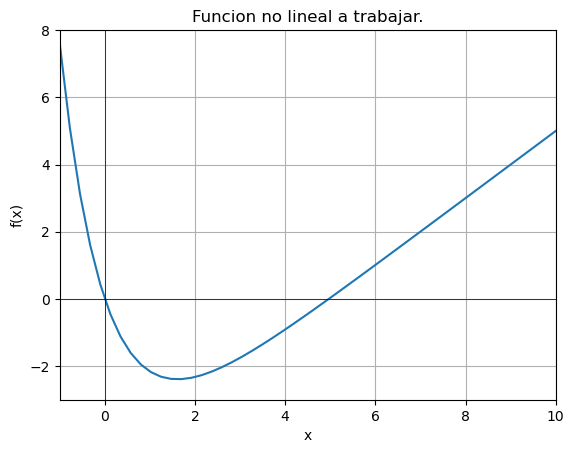

In [8]:
import matplotlib.pyplot as plt

#Se grafica para entender mejor la funcion con la que se trabaja.
eje=np.linspace(-1,10)
non_lin_func_calc=non_lin_func(eje)

plt.plot(eje,non_lin_func_calc)

plt.title("Funcion no lineal a trabajar.")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(-1, 10)
plt.ylim(-3,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.grid(True, which='both')

plt.show()

Ahora implementemos el método de Newton. Note que la función se puede derivar fácilmente de manera analítica, por lo cual no necesitamos evaluar de manera numérica su derivada. Escriba una rutina que evalúa la raíz de la ecuación a la tolerancia indicada y devuelve el valor de la raíz y el número de iteraciones requeridas.

In [10]:
# Se define la derivada de la funcion 
def non_lin_func_prime(x):
    return -1.0*5.0*np.exp(-1.0 * x)+1


'''
Se define una funcion que va a implementar el metodo para una suposicion inicial.
Se renombra x_0 (innecesario pero considero que facilita la comprension del codigo) y se inicializa un contador 
de iteraciones.
El while comprueba si se llega a la exactitud buscada, y si ya se llego a las iteraciones maximas, mientras este 
no sea el caso, se continua iterando.
En el while se reescribe x_n con el nuevo valor, y se contabiliza la iteracion.
Cuando se sale del while, se comprueba la razon de que esto haya sucedido, si se llego a las iteraciones maximas, se
despliega un error; si se llego a la exactitud buscada, se devuelven los resultados.
'''
def newton(x_0, f, fprime, epsilon = 1.0e-6,max_iter=1000):
    x_n=x_0
    iteraciones=0
    while np.abs(f(x_n)) > epsilon and iteraciones < max_iter:
        x_n = x_n - (f(x_n) / fprime(x_n))
        iteraciones += 1
    if iteraciones == max_iter:
        raise AssertionError("Se alcanzó el número máximo de iteraciones.")
    return x_n, iteraciones


'''
Se define una funcion que va a encontrar todos los ceros en un rango de busqueda.
Se inicializa varias listas para guardar:
    Los ceros encontrados (sin redondear para no perder informacion).
    Las iteraciones correspondientes a estos ceros.
    Los ceros encontrados redondeados (como  el metodo no es exacto, puede encontrar mas de un resultado que 
    satisfaga la condiciones del codigo, pero que se refieran al mismo cero; en dado caso difieren por algunos 
    decimales, por esto el redondeo).
Se utiliza un for para alimentar a 'newton' con 100 suposiciones iniciales dentro del rango de busqueda.
Tras redondear cada cero devuelto, se comprueba si este no se encuentra en 'ceros_encontrados_rounded'; en ese caso 
se guarda toda la informacion en las listas con append.
'''
def encontrar_ceros(f, fprime, x_range_1, x_range_2, epsilon=1.0e-6):
    ceros_enc = []
    iteraciones_corresp = []
    ceros_enc_rounded = []
    for x_0 in np.linspace(x_range_1, x_range_2, num=100):
        n_cero, n_iteraciones = newton(x_0, f, fprime, epsilon)
        n_cero_rounded = round(n_cero, 4)
        if n_cero_rounded not in ceros_enc_rounded:
            ceros_enc.append(n_cero)
            iteraciones_corresp.append(n_iteraciones)
            ceros_enc_rounded.append(n_cero_rounded)
    return ceros_enc , iteraciones_corresp


# Se define el rango de busqueda y se llama la funcion.
x_range_1 = 1
x_range_2 = 2
n_ceros_encontrados , n_iteraciones_correspondientes = encontrar_ceros(non_lin_func, non_lin_func_prime, 
                                                                       x_range_1,x_range_2)

# Se imprime la informacion para su lectura.
print(f'Usando un rango de busqueda que va desde {x_range_1} hasta {x_range_2} con el metodo de Newton se obtuvo:')
for i in range(len(n_ceros_encontrados)):
    print('El cero: '+str(n_ceros_encontrados[i])+'. Tras '+str(n_iteraciones_correspondientes[i])+' iteraciones.')


Usando un rango de busqueda que va desde 1 hasta 2 con el metodo de Newton se obtuvo:
El cero: -3.8694996886171165e-13. Tras 7 iteraciones.
El cero: 4.965114231752603. Tras 4 iteraciones.


Implementemos el método de la bisección y evaluemos su comportamiento.

In [11]:
'''
Primero se comprueba si las imagenes de los valores iniciales tienen el mismo signo, en caso contrario, se continua.
Se comprueba que valor es el menor, para renombrarle como el valor inferior, y al otro como valor superior.
Se calcula el primer x_prime (este metodo por ser llamado, ya supone una iteracion, por eso el contador respectivo 
inicia en 1).
El while comprueba si se llega a la exactitud buscada, y si ya se llego a las iteraciones maximas, mientras este 
no sea el caso, se continua iterando.
Se comprueba si la imagen de x_prime es negativa; dependiendo de la respuesta a esto, se reescribe el valor inferior
(o superior) con x_prime.
Con este nuevo valor inferior (o superior), se calcula un nuevo x_prime; y se contabiliza la iteracion.
Cuando se sale del while, se comprueba la razon de que esto haya sucedido, si se llego a las iteraciones maximas, se
despliega un error; si se llego a la exactitud buscada, se devuelven los resultados.
'''
def bisection(x_1, x_2, f, epsilon = 1.0e-6,max_iter=100000):
    if(np.sign(f(x_1)) == np.sign(f(x_2))):
        raise AssertionError("Las imagenes de los valores iniciales deben tener signos opuestos.")
    x_inf, x_sup = (x_1, x_2) if x_1 < x_2 else (x_2, x_1)    
    x_prime=(x_inf+x_sup)/2
    iteraciones=1
    while np.abs(f(x_prime))>epsilon and iteraciones < max_iter:
        if np.sign(f(x_prime))==-1:
            x_inf=x_prime
        else:
            x_sup=x_prime
        x_prime=(x_inf+x_sup)/2
        iteraciones+=1
    if iteraciones == max_iter:
        raise AssertionError("Se alcanzó el número máximo de iteraciones.")
    return x_prime , iteraciones


#Por el funcionamiento del metodo, no se implementa una rutina que encuentre todos los ceros.


# Se definen los valores iniciales y se llama la funcion.
x_1=2
x_2=6
b_cero,b_iteraciones = bisection(x_1,x_2,non_lin_func)


# Se imprime la informacion para su lectura.
print(f'Tras {b_iteraciones} iteraciones con el metodo de biseccion y los valores iniciales {x_1} y {x_2}, se encontro que el cero es {b_cero}')


Tras 20 iteraciones con el metodo de biseccion y los valores iniciales 2 y 6, se encontro que el cero es 4.965114593505859
